# SQL

In [ ]:
small_business_df = _deepnote_execute_sql('SELECT LATITUDE, LONGITUDE, LEGAL_NAME, TIF_Name\nFROM \'/work/Business Info By Size/SmallBusinessInfo.csv\'\nORDER BY TIF_Name', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
small_business_df

LATITUDE  LONGITUDE                          LEGAL_NAME  \
0       41.699547 -87.642752  SAVER'S FRESH MARKET ROSELAND, L3C   
1       41.699547 -87.642752  SAVER'S FRESH MARKET ROSELAND, L3C   
2       41.707210 -87.628359     HUT FISH & CHICKEN & MORE, INC.   
3       41.707210 -87.628359                         THE HUT INC   
4       41.707210 -87.628359                TAHER & RAFATI, INC.   
...           ...        ...                                 ...   
585307  41.724860 -87.632296    SWEET & SAVORY CHEF SERVICES LLC   
585308  41.899355 -87.621791              ELIAS A. KANELLOPOULOS   
585309  41.778975 -87.695513                        RODRIGO BUZO   
585310  41.950391 -87.747379      NEW MILLENNIUM AUTO CARE, INC.   
585311  41.885444 -87.632582                     GC Pivotal, LLC   

                                                 TIF_Name  
0       ['105th Street and Vincennes Avenue', '107th/H...  
1       ['105th Street and Vincennes Avenue', '107th/H...  
2       ['105th Street and Vincennes Avenue', 'Roselan...  
3       ['105th Street and Vincennes Avenue', 'Roselan...  
4       ['105th Street and Vincennes Avenue', 'Roselan...  
...                                                   ...  
585307                                                 []  
585308                                                 []  
585309                                                 []  
585310                                                 []  
585311                                                 []  

[585312 rows x 4 columns]

In [ ]:
medium_business_df = _deepnote_execute_sql('SELECT LATITUDE, LONGITUDE, LEGAL_NAME, TIF_Name\nFROM \'/work/Business Info By Size/MediumBusinessInfo.csv\'\nORDER BY TIF_Name', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
medium_business_df

LATITUDE  LONGITUDE  \
0       41.699547 -87.642752   
1       41.699547 -87.642752   
2       41.699547 -87.642752   
3       41.699547 -87.642752   
4       41.699547 -87.642752   
...           ...        ...   
255142  41.894798 -87.615867   
255143  41.886710 -87.629303   
255144  41.895840 -87.624988   
255145  41.895840 -87.624988   
255146  41.958152 -87.708001   

                                               LEGAL_NAME  \
0                                        MORAN FOODS, LLC   
1                                    DELRAY FARMS, L.L.C.   
2                                        MORAN FOODS, LLC   
3                                        MORAN FOODS, LLC   
4                                        MORAN FOODS, LLC   
...                                                   ...   
255142  ANN & ROBERT H. LURIE CHILDREN'S HOSPITAL OF C...   
255143                        35 WEST LIMITED PARTNERSHIP   
255144                              PENINSULA CHICAGO LLC   
255145                              PENINSULA CHICAGO LLC   
255146                                         JOSE LOPEZ   

                                                 TIF_Name  
0       ['105th Street and Vincennes Avenue', '107th/H...  
1       ['105th Street and Vincennes Avenue', '107th/H...  
2       ['105th Street and Vincennes Avenue', '107th/H...  
3       ['105th Street and Vincennes Avenue', '107th/H...  
4       ['105th Street and Vincennes Avenue', '107th/H...  
...                                                   ...  
255142                                                 []  
255143                                                 []  
255144                                                 []  
255145                                                 []  
255146                                                 []  

[255147 rows x 4 columns]

In [ ]:
big_business_df = _deepnote_execute_sql('SELECT LATITUDE, LONGITUDE, LEGAL_NAME, TIF_Name\nFROM \'/work/Business Info By Size/BigBusinessInfo.csv\'\nORDER BY TIF_Name', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
big_business_df

LATITUDE  LONGITUDE                                 LEGAL_NAME  \
0       41.699547 -87.642752                 YELLOW BANANA ILLINOIS LLC   
1       41.706989 -87.628590             WENTWORTH COMMUNICATIONS, INC.   
2       41.708644 -87.643024                            KFC CORPORATION   
3       41.706815 -87.642180                  HIGHLAND PARK CVS, L.L.C.   
4       41.708429 -87.655566  J & M RESTAURANT ENTERPRISES INCORPORATED   
...           ...        ...                                        ...   
193152  41.886352 -87.632614                        DINEAMIC STEAK, LLC   
193153  41.995924 -87.787638         BOND DRUG COMPANY OF ILLINOIS, LLC   
193154  41.888000 -87.622565                          HYATT CORPORATION   
193155  41.738831 -87.663289    AABALL HEATING SERVICE & SUPPLIES, INC.   
193156  41.888201 -87.620971                  LA CUISSE DE CANARD, INC.   

                                                 TIF_Name  
0       ['105th Street and Vincennes Avenue', '107th/H...  
1                   ['105th Street and Vincennes Avenue']  
2                   ['105th Street and Vincennes Avenue']  
3                   ['105th Street and Vincennes Avenue']  
4                   ['105th Street and Vincennes Avenue']  
...                                                   ...  
193152                                                 []  
193153                                                 []  
193154                                                 []  
193155                                                 []  
193156                                                 []  

[193157 rows x 4 columns]

# Python

### Setting up functions and a frame to be used for all types of businesses

In [ ]:
!pip install geopy
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap
import json
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 10.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
frame = gpd.read_file('BoundariesCommunity.geojson')
merged_geometry = frame.geometry.unary_union
tif_geo = gpd.read_file('Boundaries TIF.geojson')[['name', 'geometry']]
All_df = pd.read_csv('BusWithTIF.csv')
classes = All_df['TIF_Name'].unique()
cmap = get_cmap('tab20')
class_colors = {class_name: cmap(i % 20) for i, class_name in enumerate(classes)}

In [ ]:
def getInOutIndices(df):
    inTIF = []
    outTIF = []
    for index, row in df.iterrows():
        if len(row['TIF_Name']) <= 2:
            outTIF.append(index)
        else:
            inTIF.append(index)
    
    return inTIF, outTIF

def business_out_points_plot(business_out_df):
    business_out_points = gpd.GeoDataFrame(
        business_out_df, geometry=gpd.points_from_xy(business_out_df.LONGITUDE,business_out_df.LATITUDE))
    fig, ax = plt.subplots(1, 1, figsize=(60, 70))
    frame.plot(ax=ax)
    business_out_points.plot(ax=ax, color='white', markersize=5)

def business_in_points_plot(business_in_df):
    business_in_points = gpd.GeoDataFrame(
        business_in_df, geometry=gpd.points_from_xy(business_in_df.LONGITUDE,business_in_df.LATITUDE))
    
    fig, ax = plt.subplots(1, 1, figsize=(40, 40))
    gpd.GeoSeries([merged_geometry]).plot(ax=ax, facecolor='grey', edgecolor='black', linewidth=1, alpha=0.2)
    for class_name, color in class_colors.items():
        class_gdf = business_in_points[business_in_points['TIF_Name'] == class_name]
        class_gdf.plot(ax=ax, color=color, label=class_name, markersize=10, alpha=0.7)

    plt.show()

### Visualize whole TIF according to the color scheme

/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/pytho

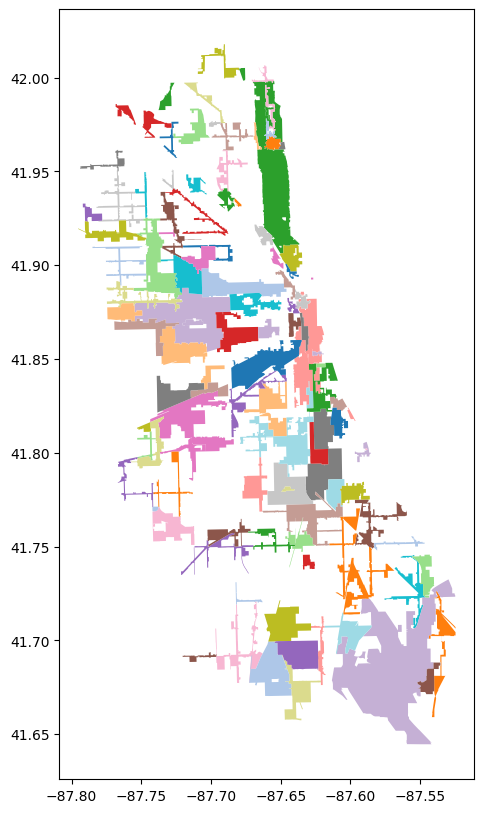

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for class_name, color in class_colors.items():
    dummy = tif_geo[tif_geo['name'] == class_name[2:-2]]
    dummy.plot(ax=ax, color=color)

### Small Businesses Visualization

In [ ]:
small_business_in, small_business_out = getInOutIndices(small_business_df)
small_business_in_df = small_business_df.iloc[small_business_in]
small_business_out_df = small_business_df.iloc[small_business_out][['LEGAL_NAME', 'LATITUDE', 'LONGITUDE']]

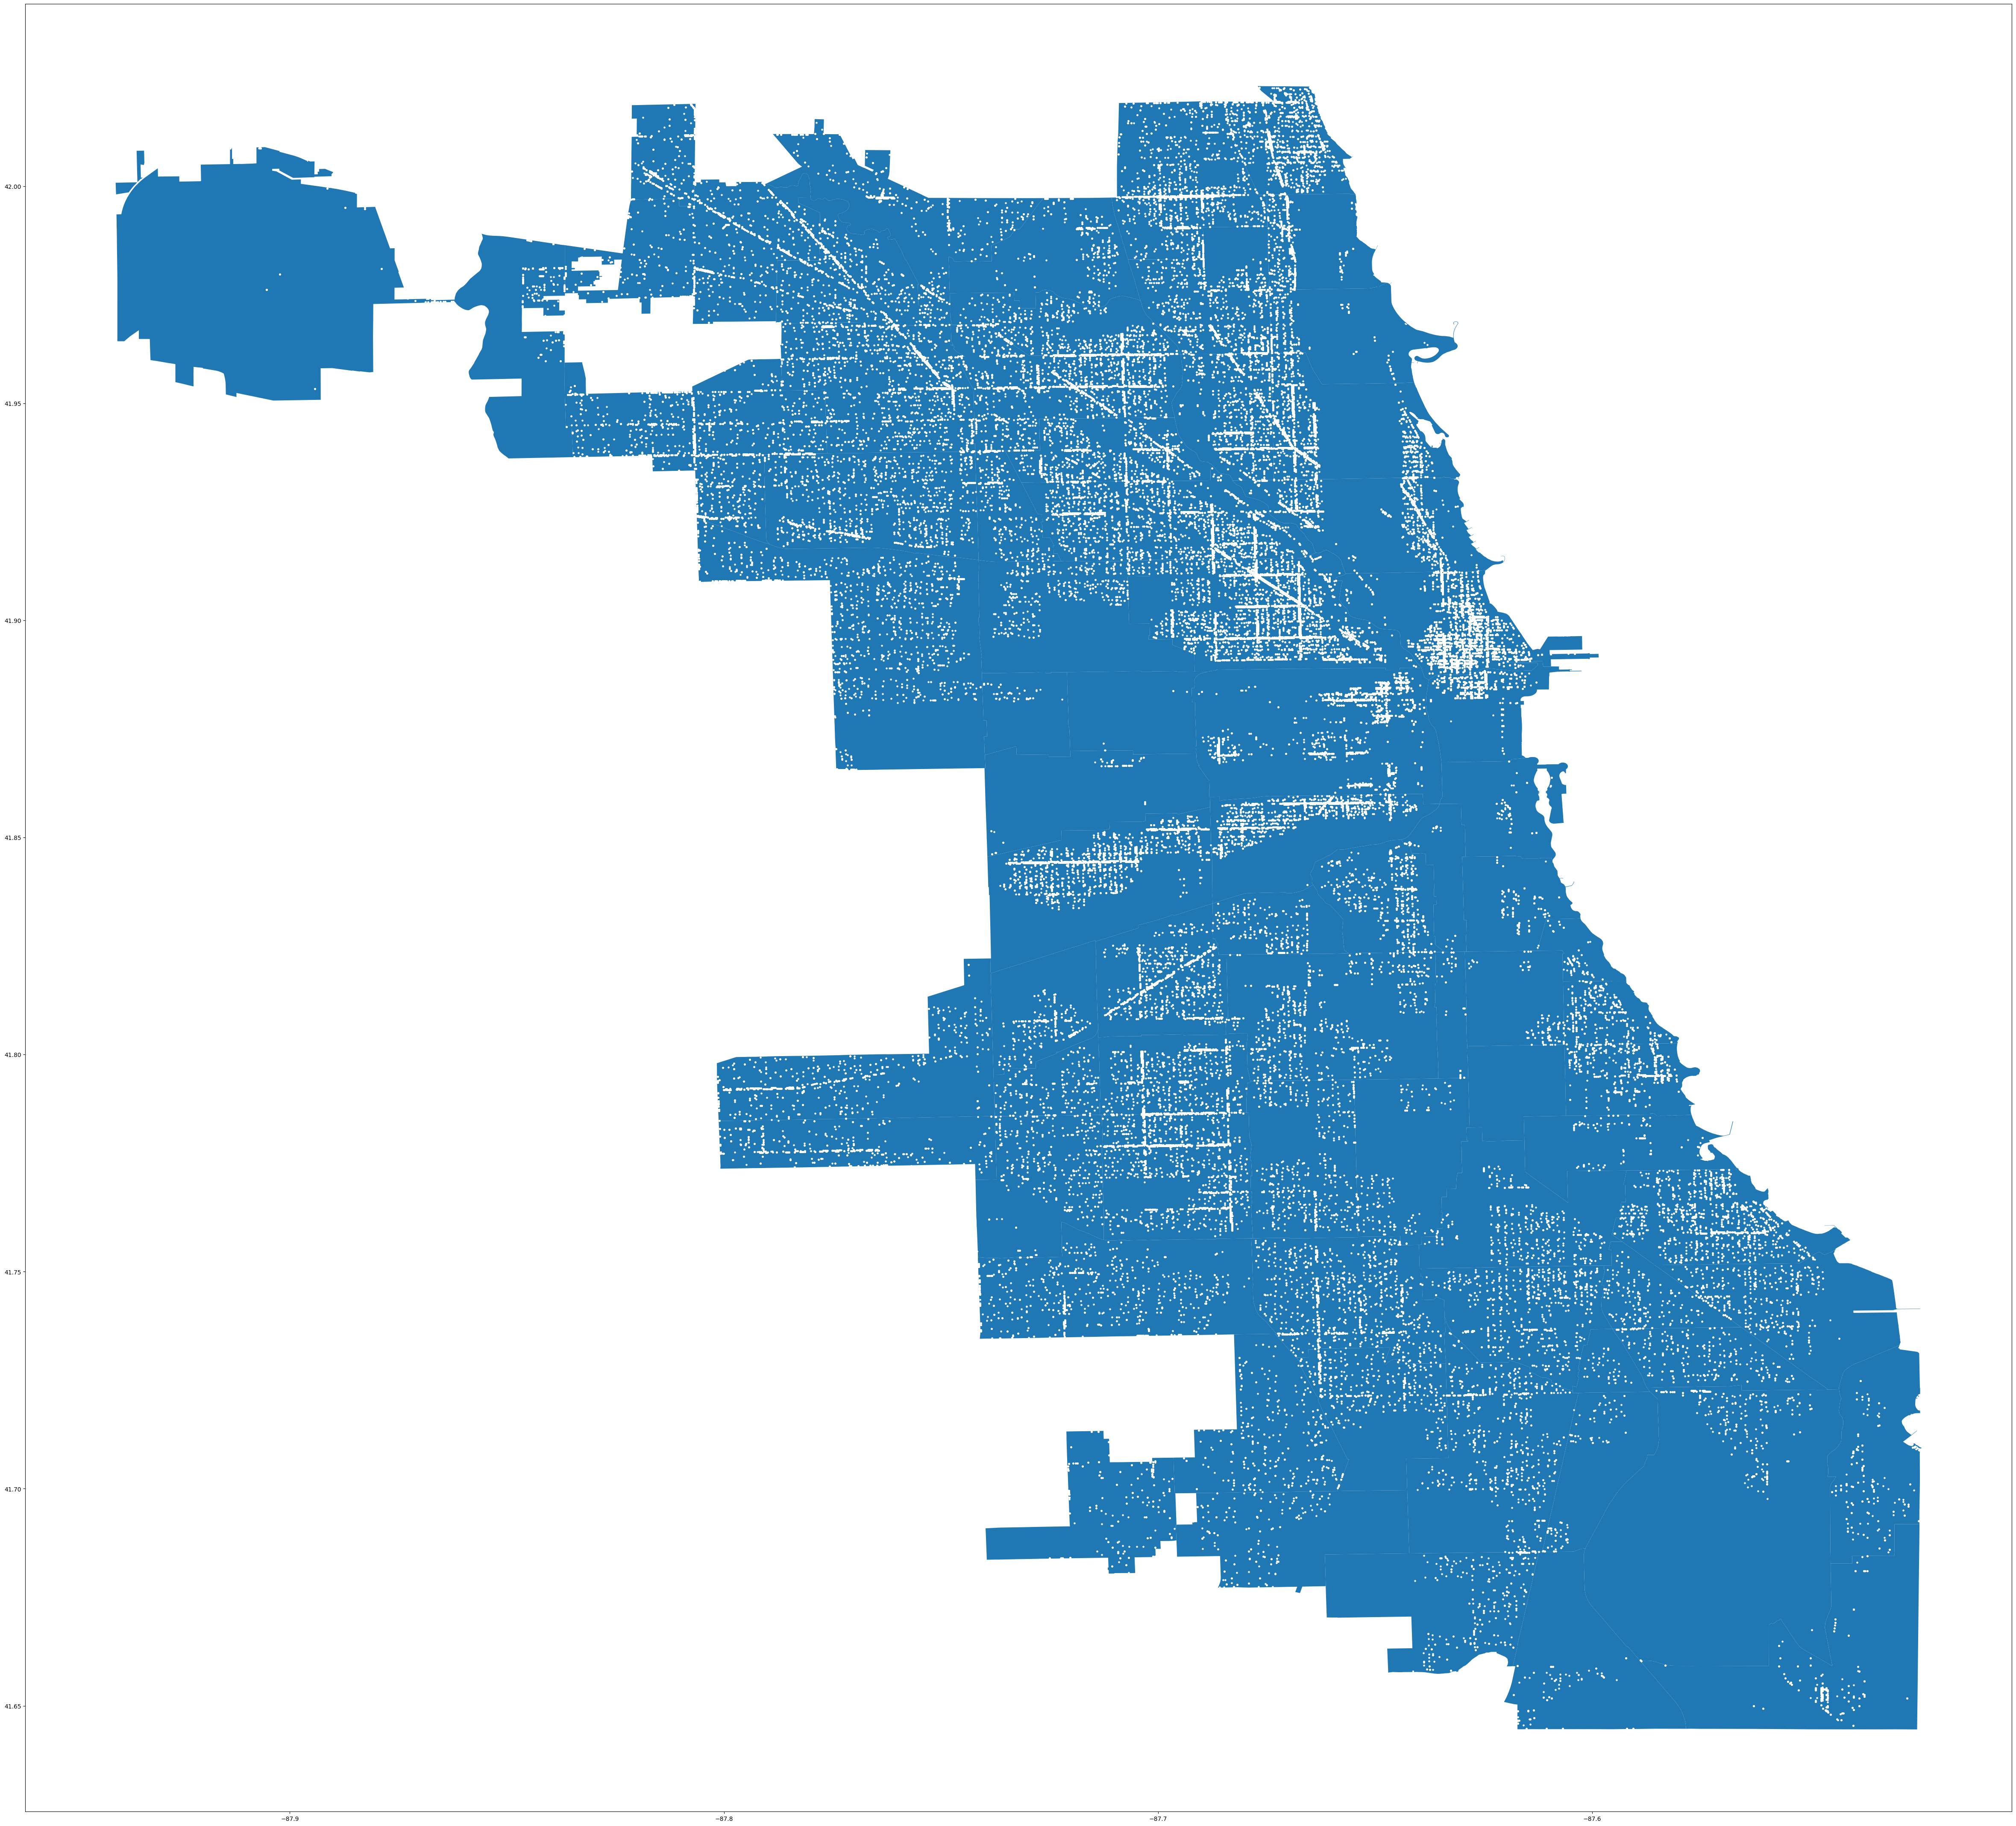

In [ ]:
business_out_points_plot(small_business_out_df)

/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


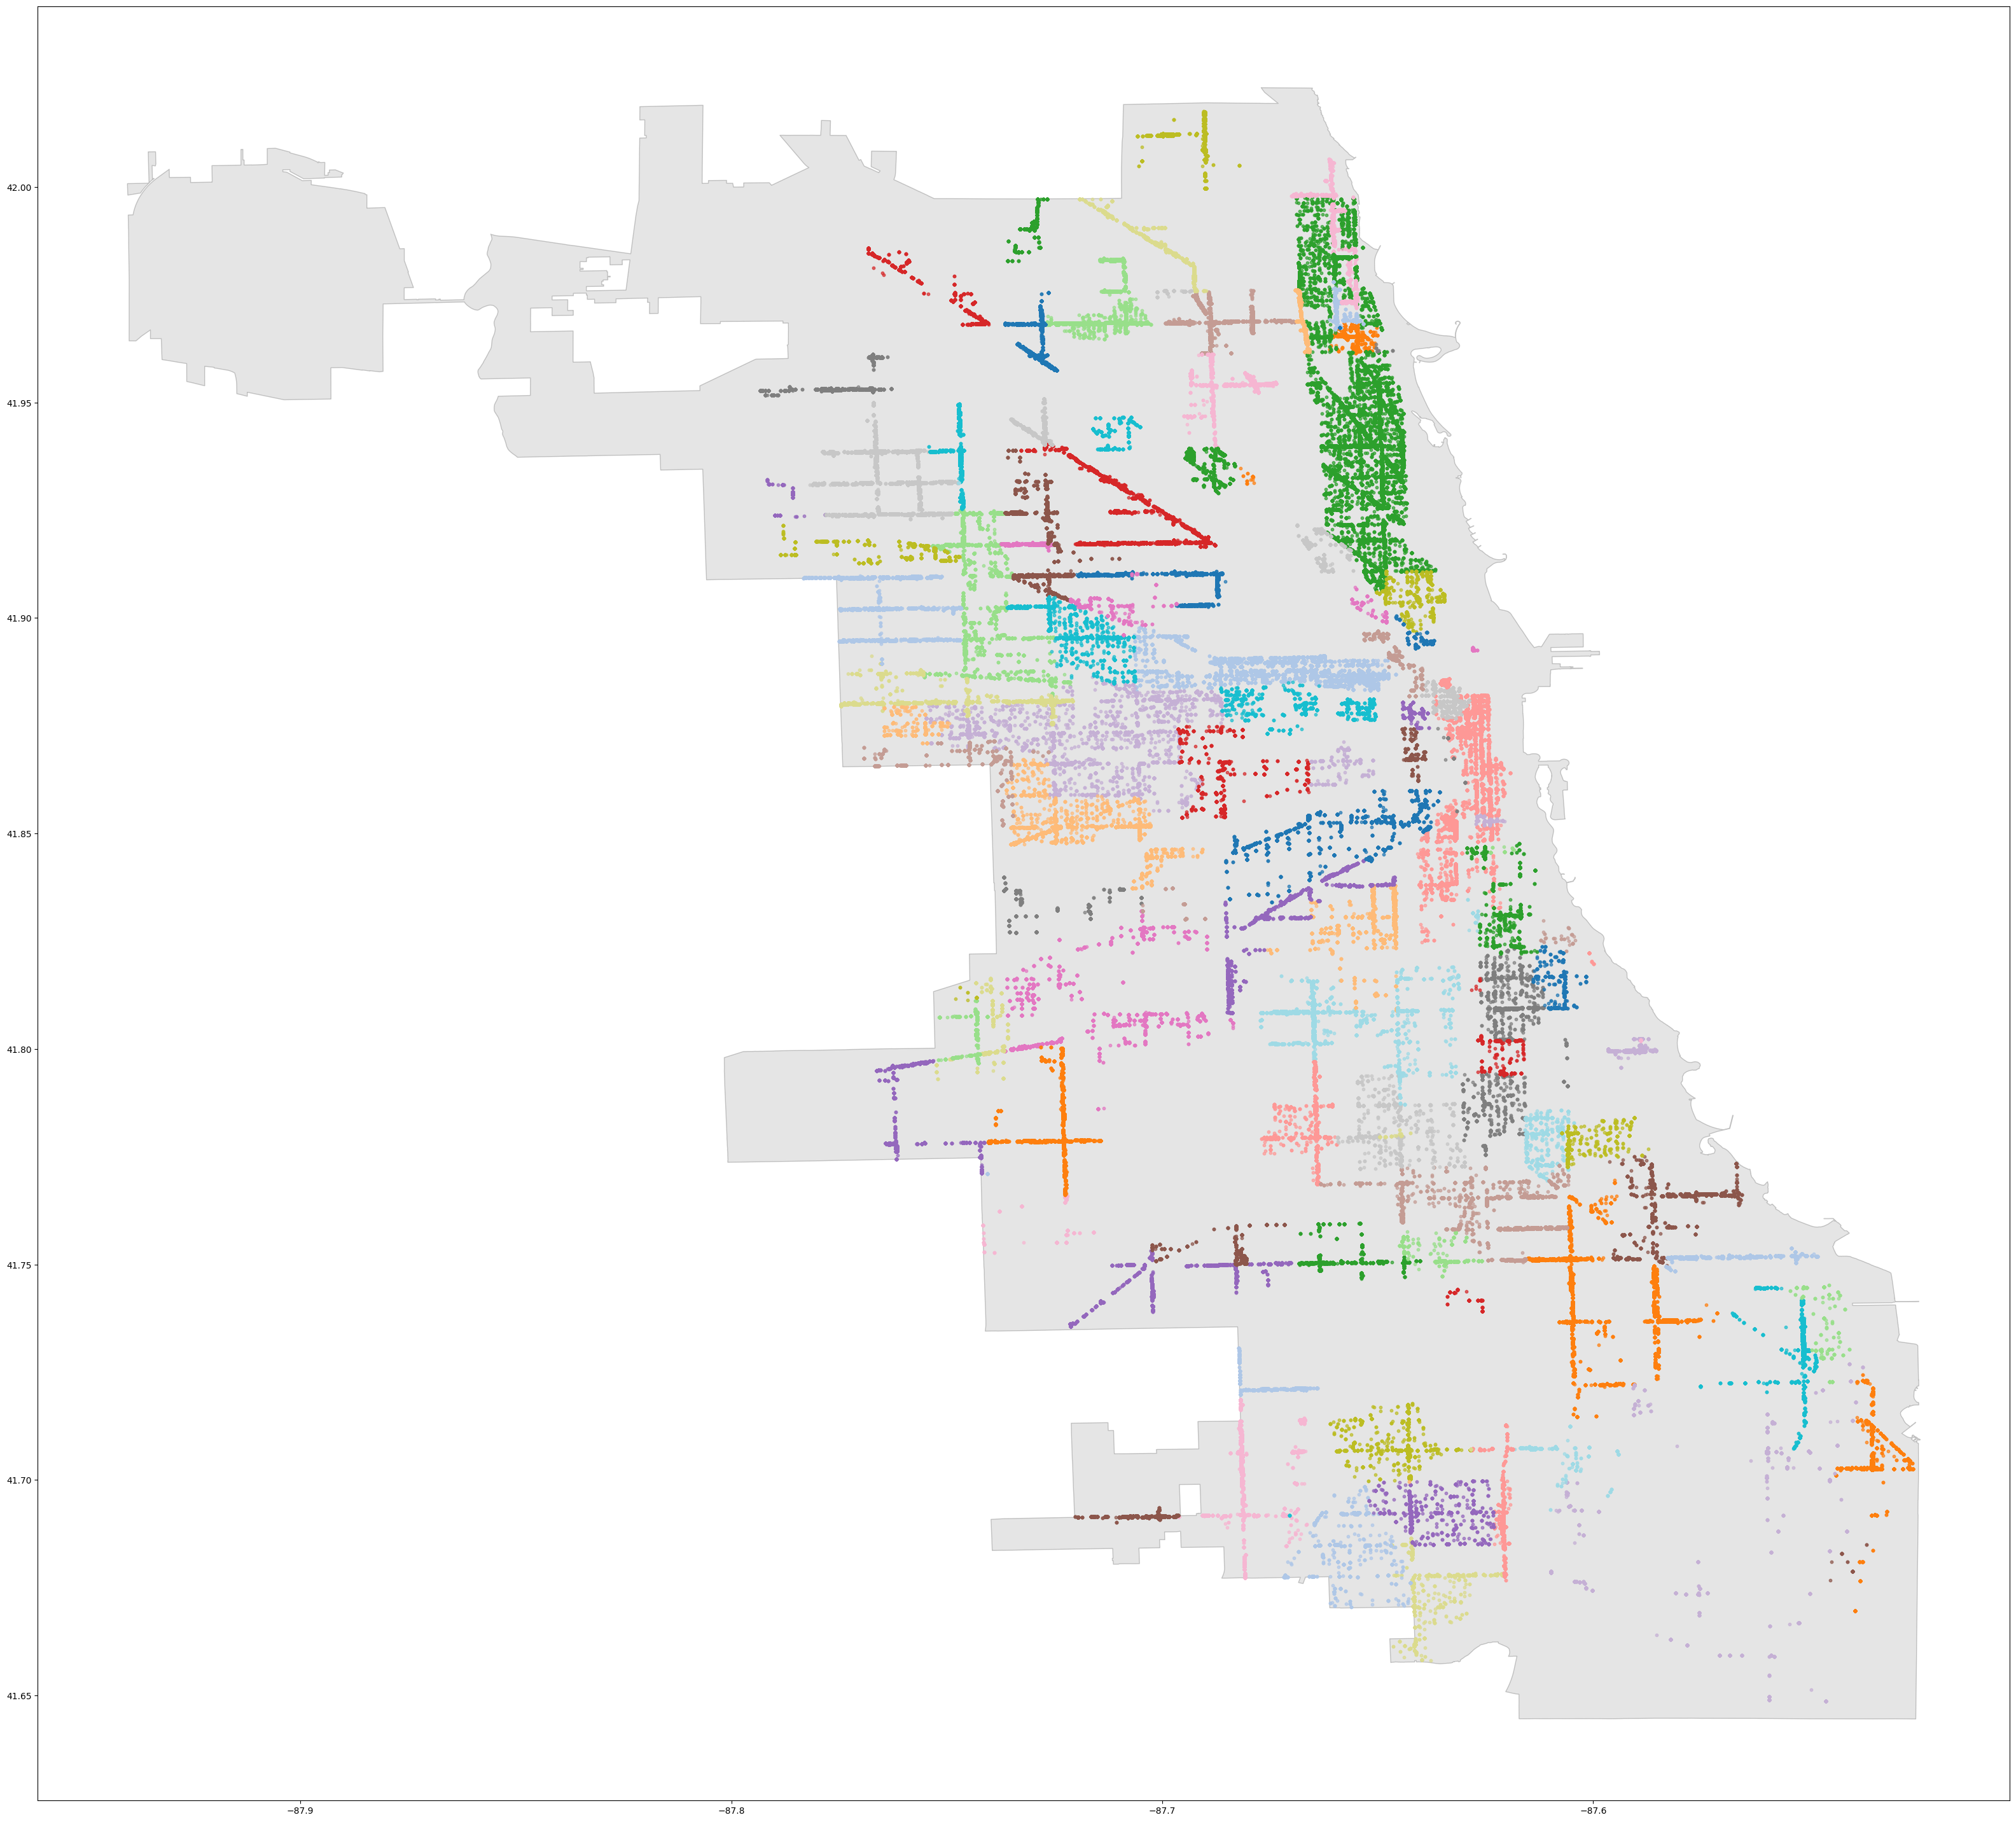

In [ ]:
business_in_points_plot(small_business_in_df)

In [ ]:
len(small_business_in_df)

282264

### Medium Businesses Visualizations

In [ ]:
medium_business_in, medium_business_out = getInOutIndices(medium_business_df)
medium_business_in_df = medium_business_df.iloc[medium_business_in]
medium_business_out_df = medium_business_df.iloc[medium_business_out][['LEGAL_NAME', 'LATITUDE', 'LONGITUDE']]

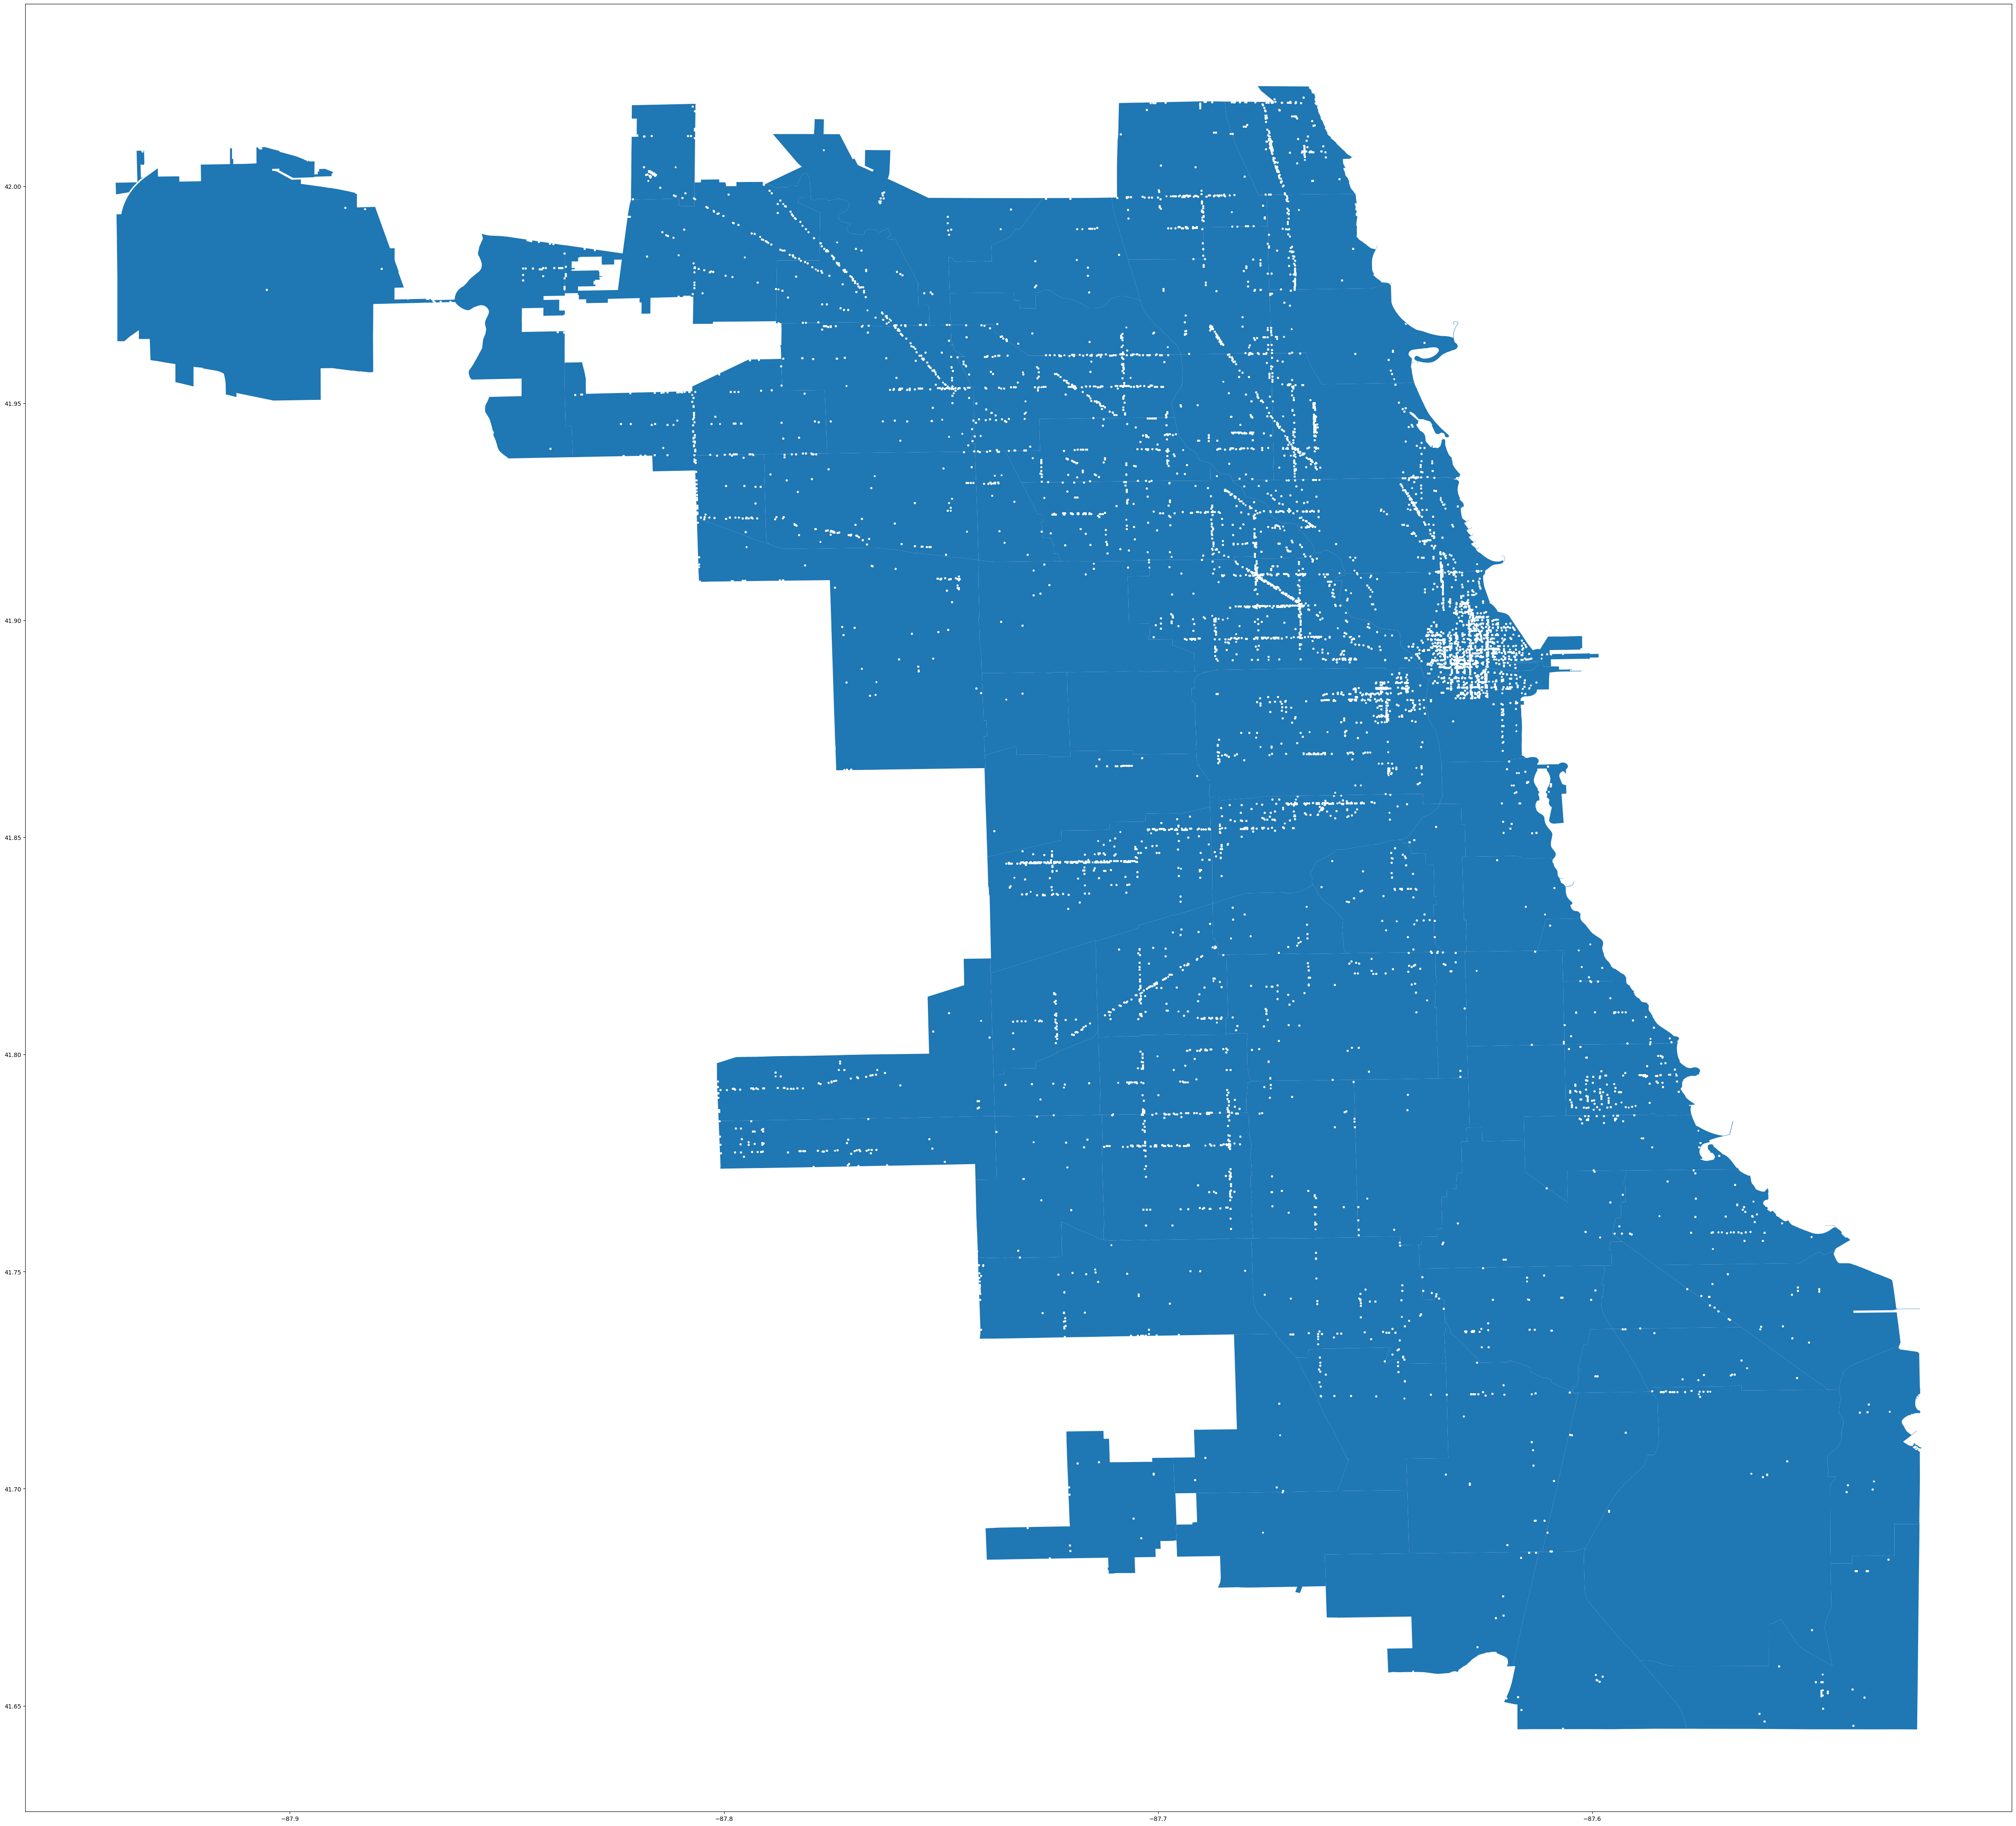

In [ ]:
business_out_points_plot(medium_business_out_df)

/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/pytho

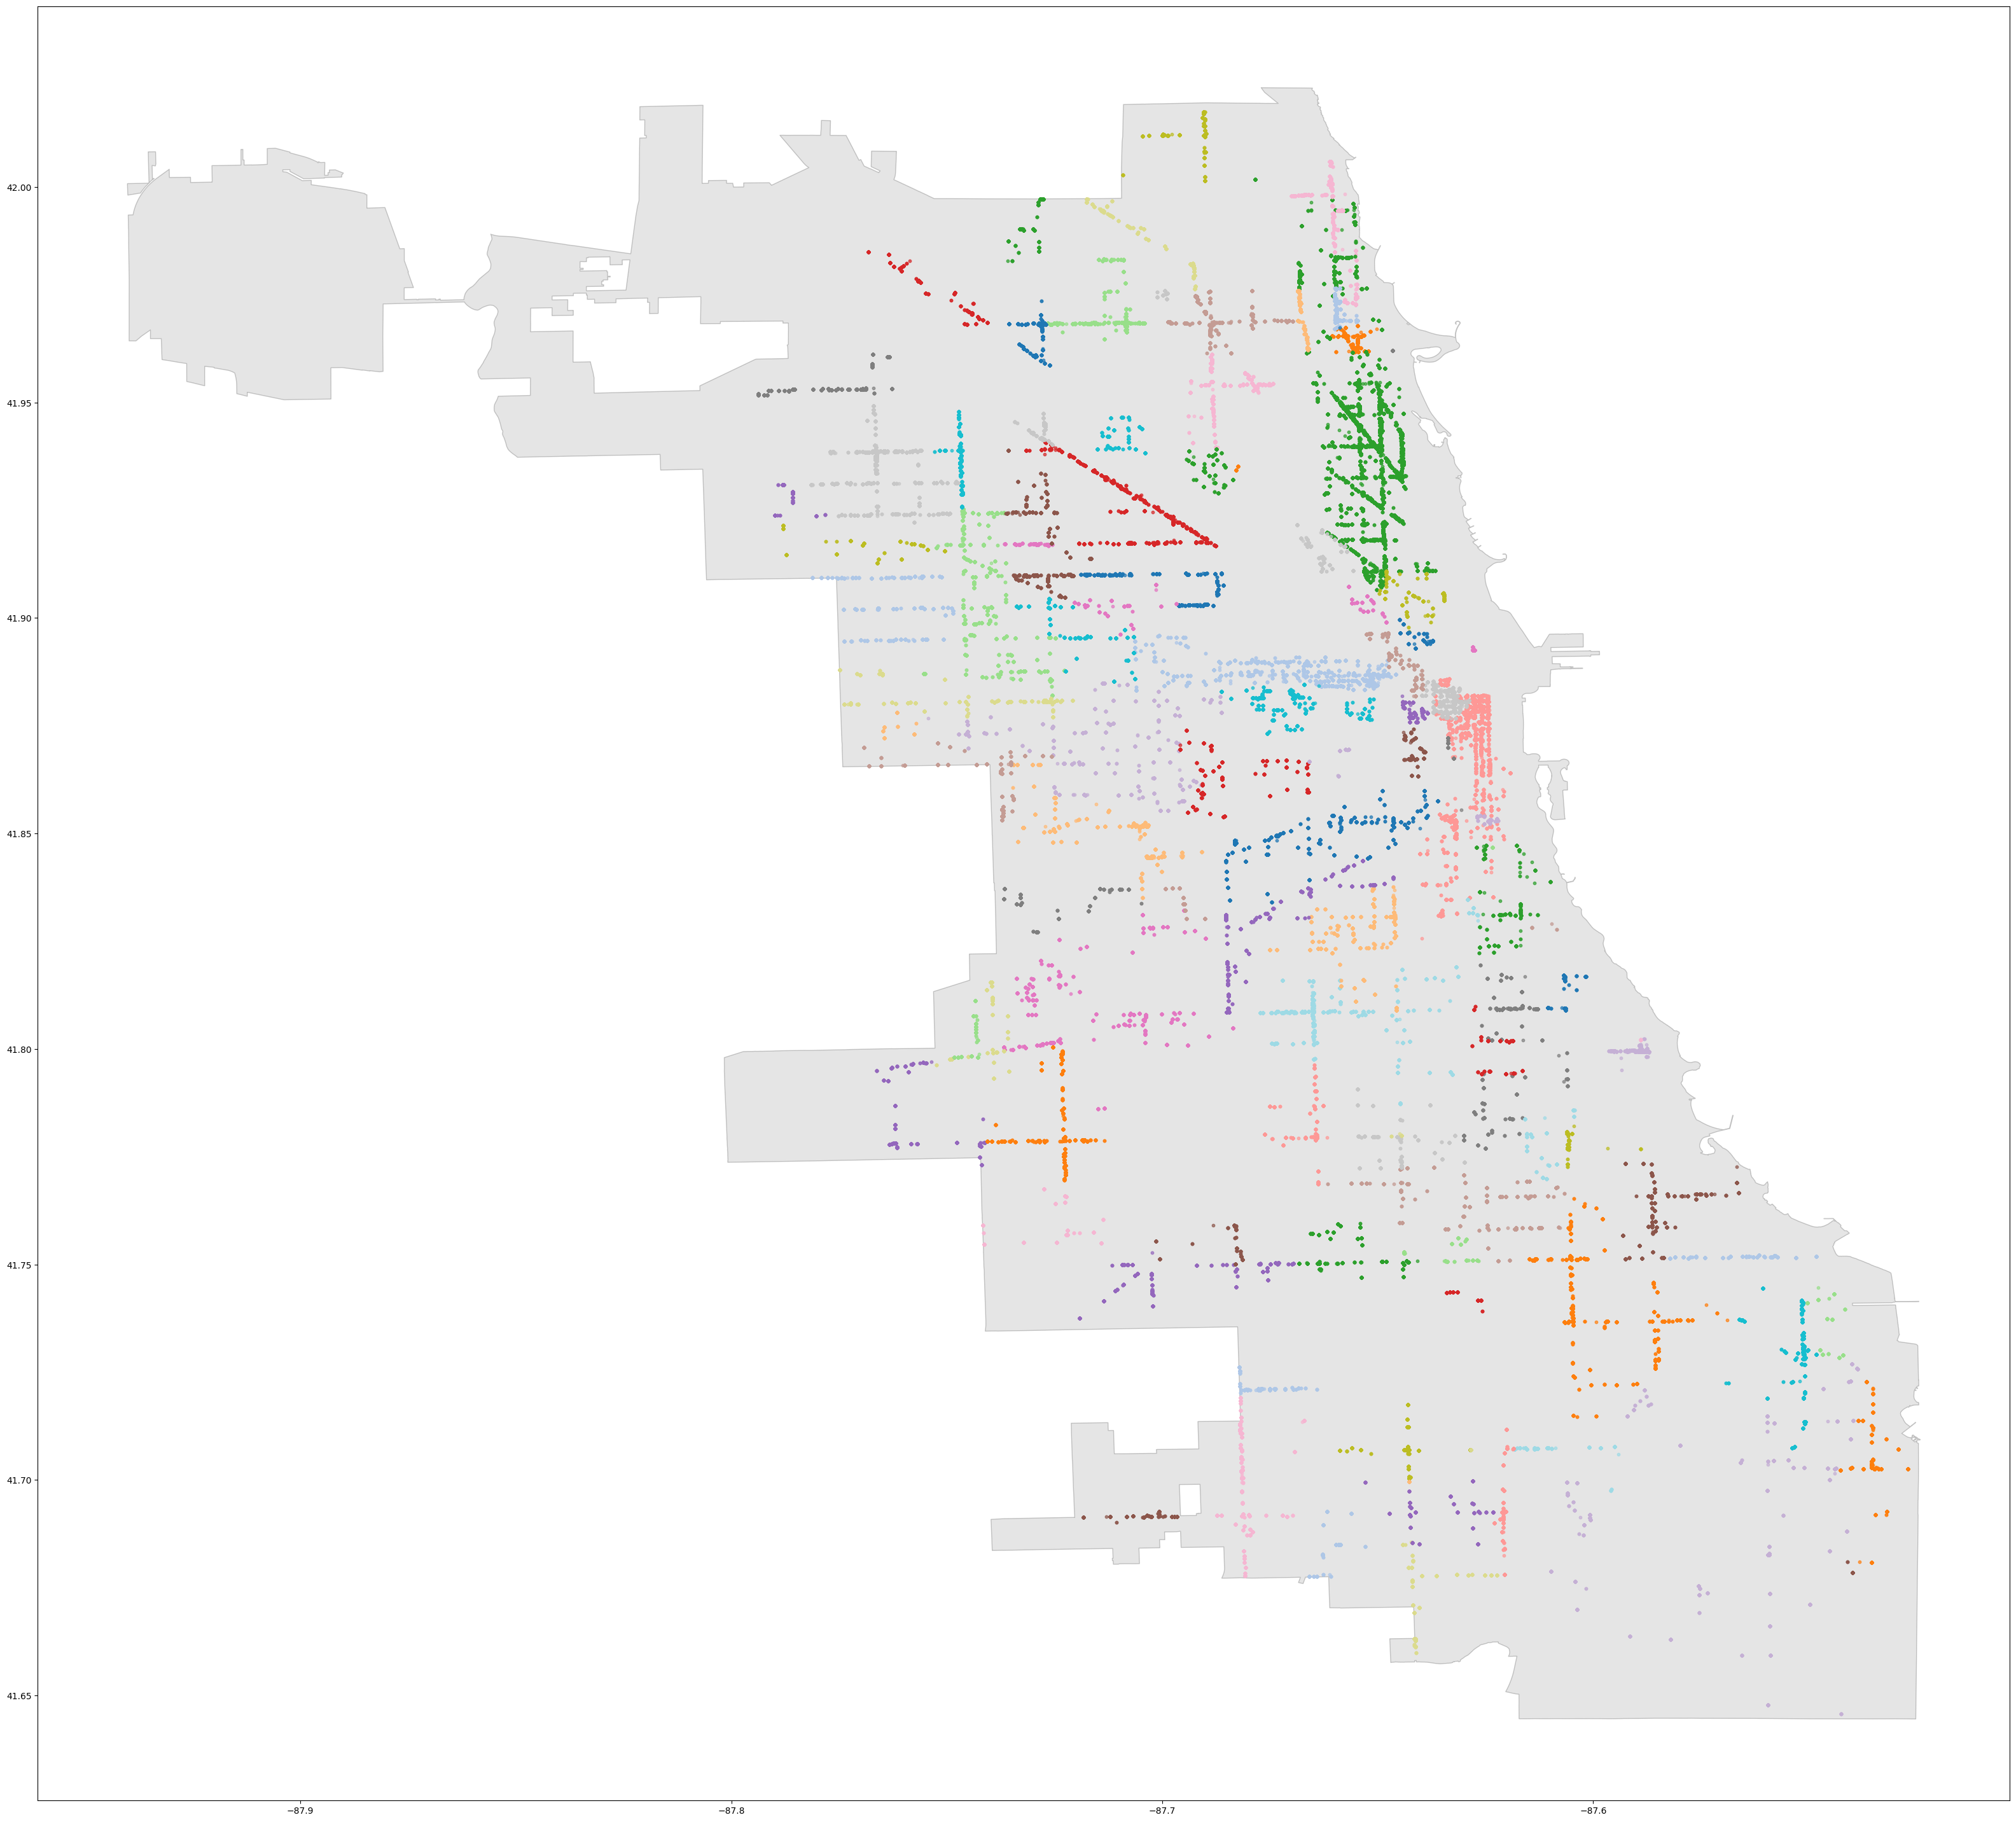

In [ ]:
business_in_points_plot(medium_business_in_df)

### Big Businesses Visualizations

In [ ]:
big_business_in, big_business_out = getInOutIndices(big_business_df)
big_business_in_df = big_business_df.iloc[big_business_in]
big_business_out_df = big_business_df.iloc[big_business_out][['LEGAL_NAME', 'LATITUDE', 'LONGITUDE']]

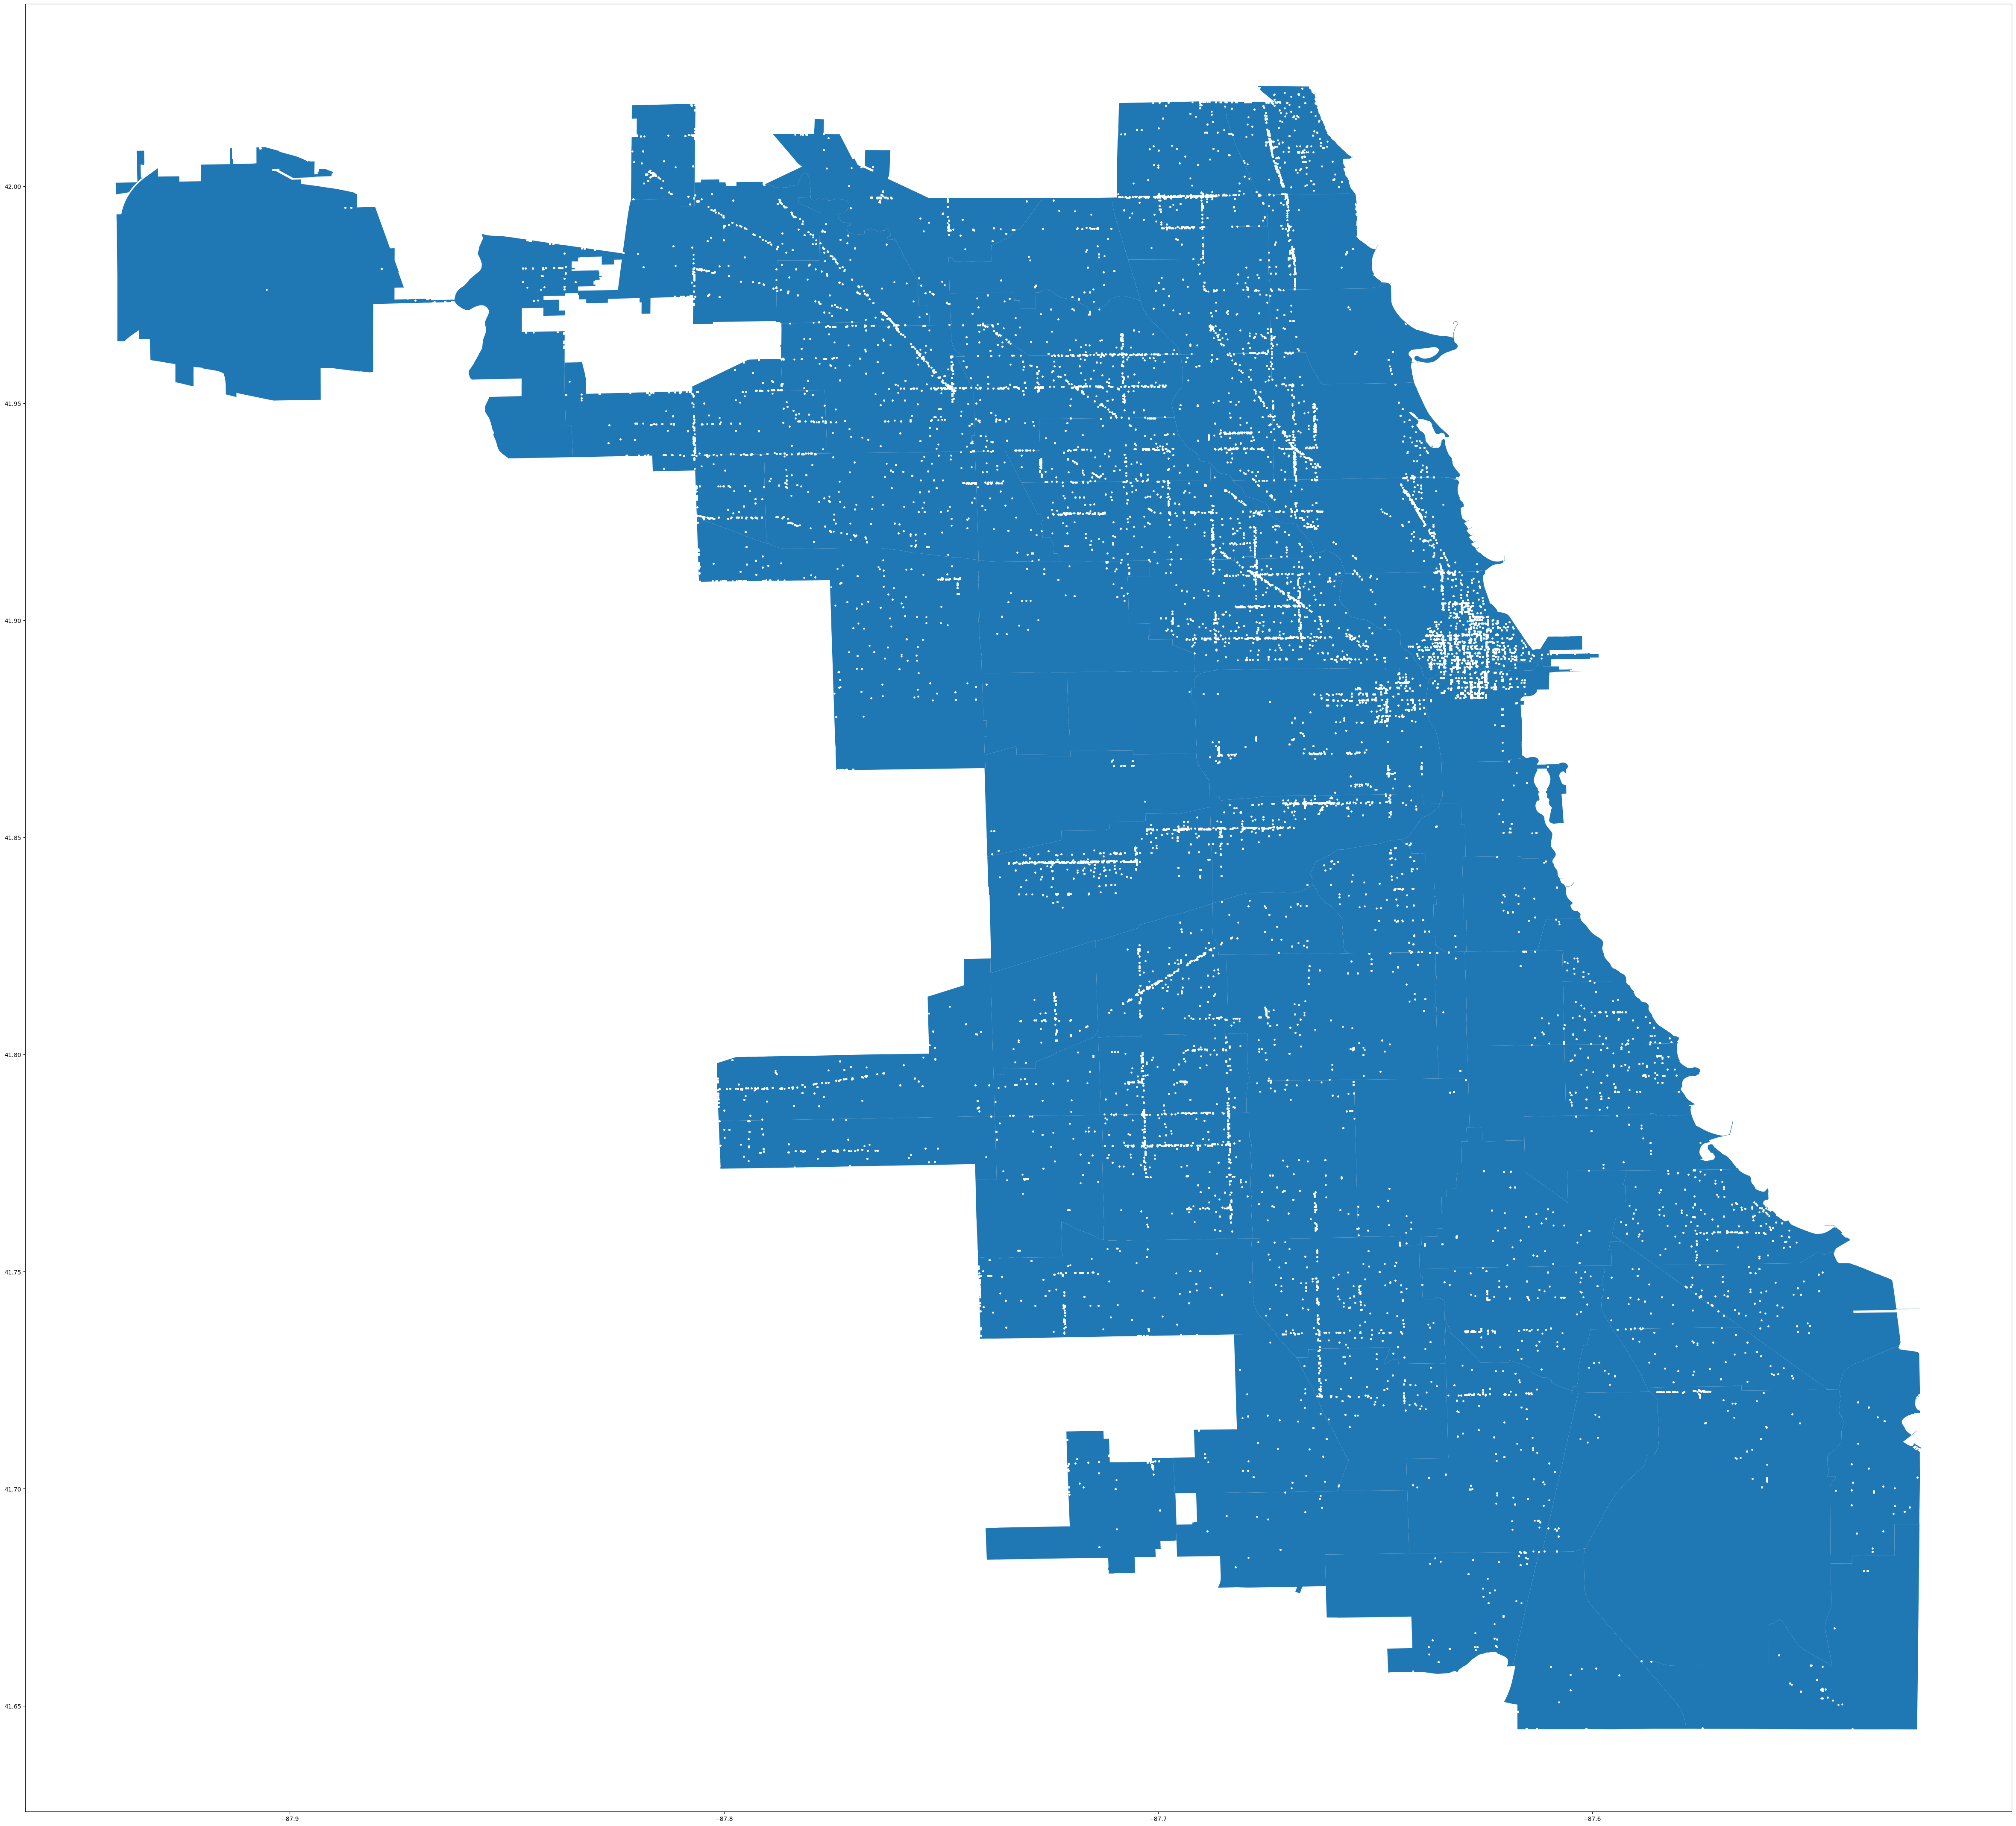

In [ ]:
business_out_points_plot(big_business_out_df)

/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/pytho

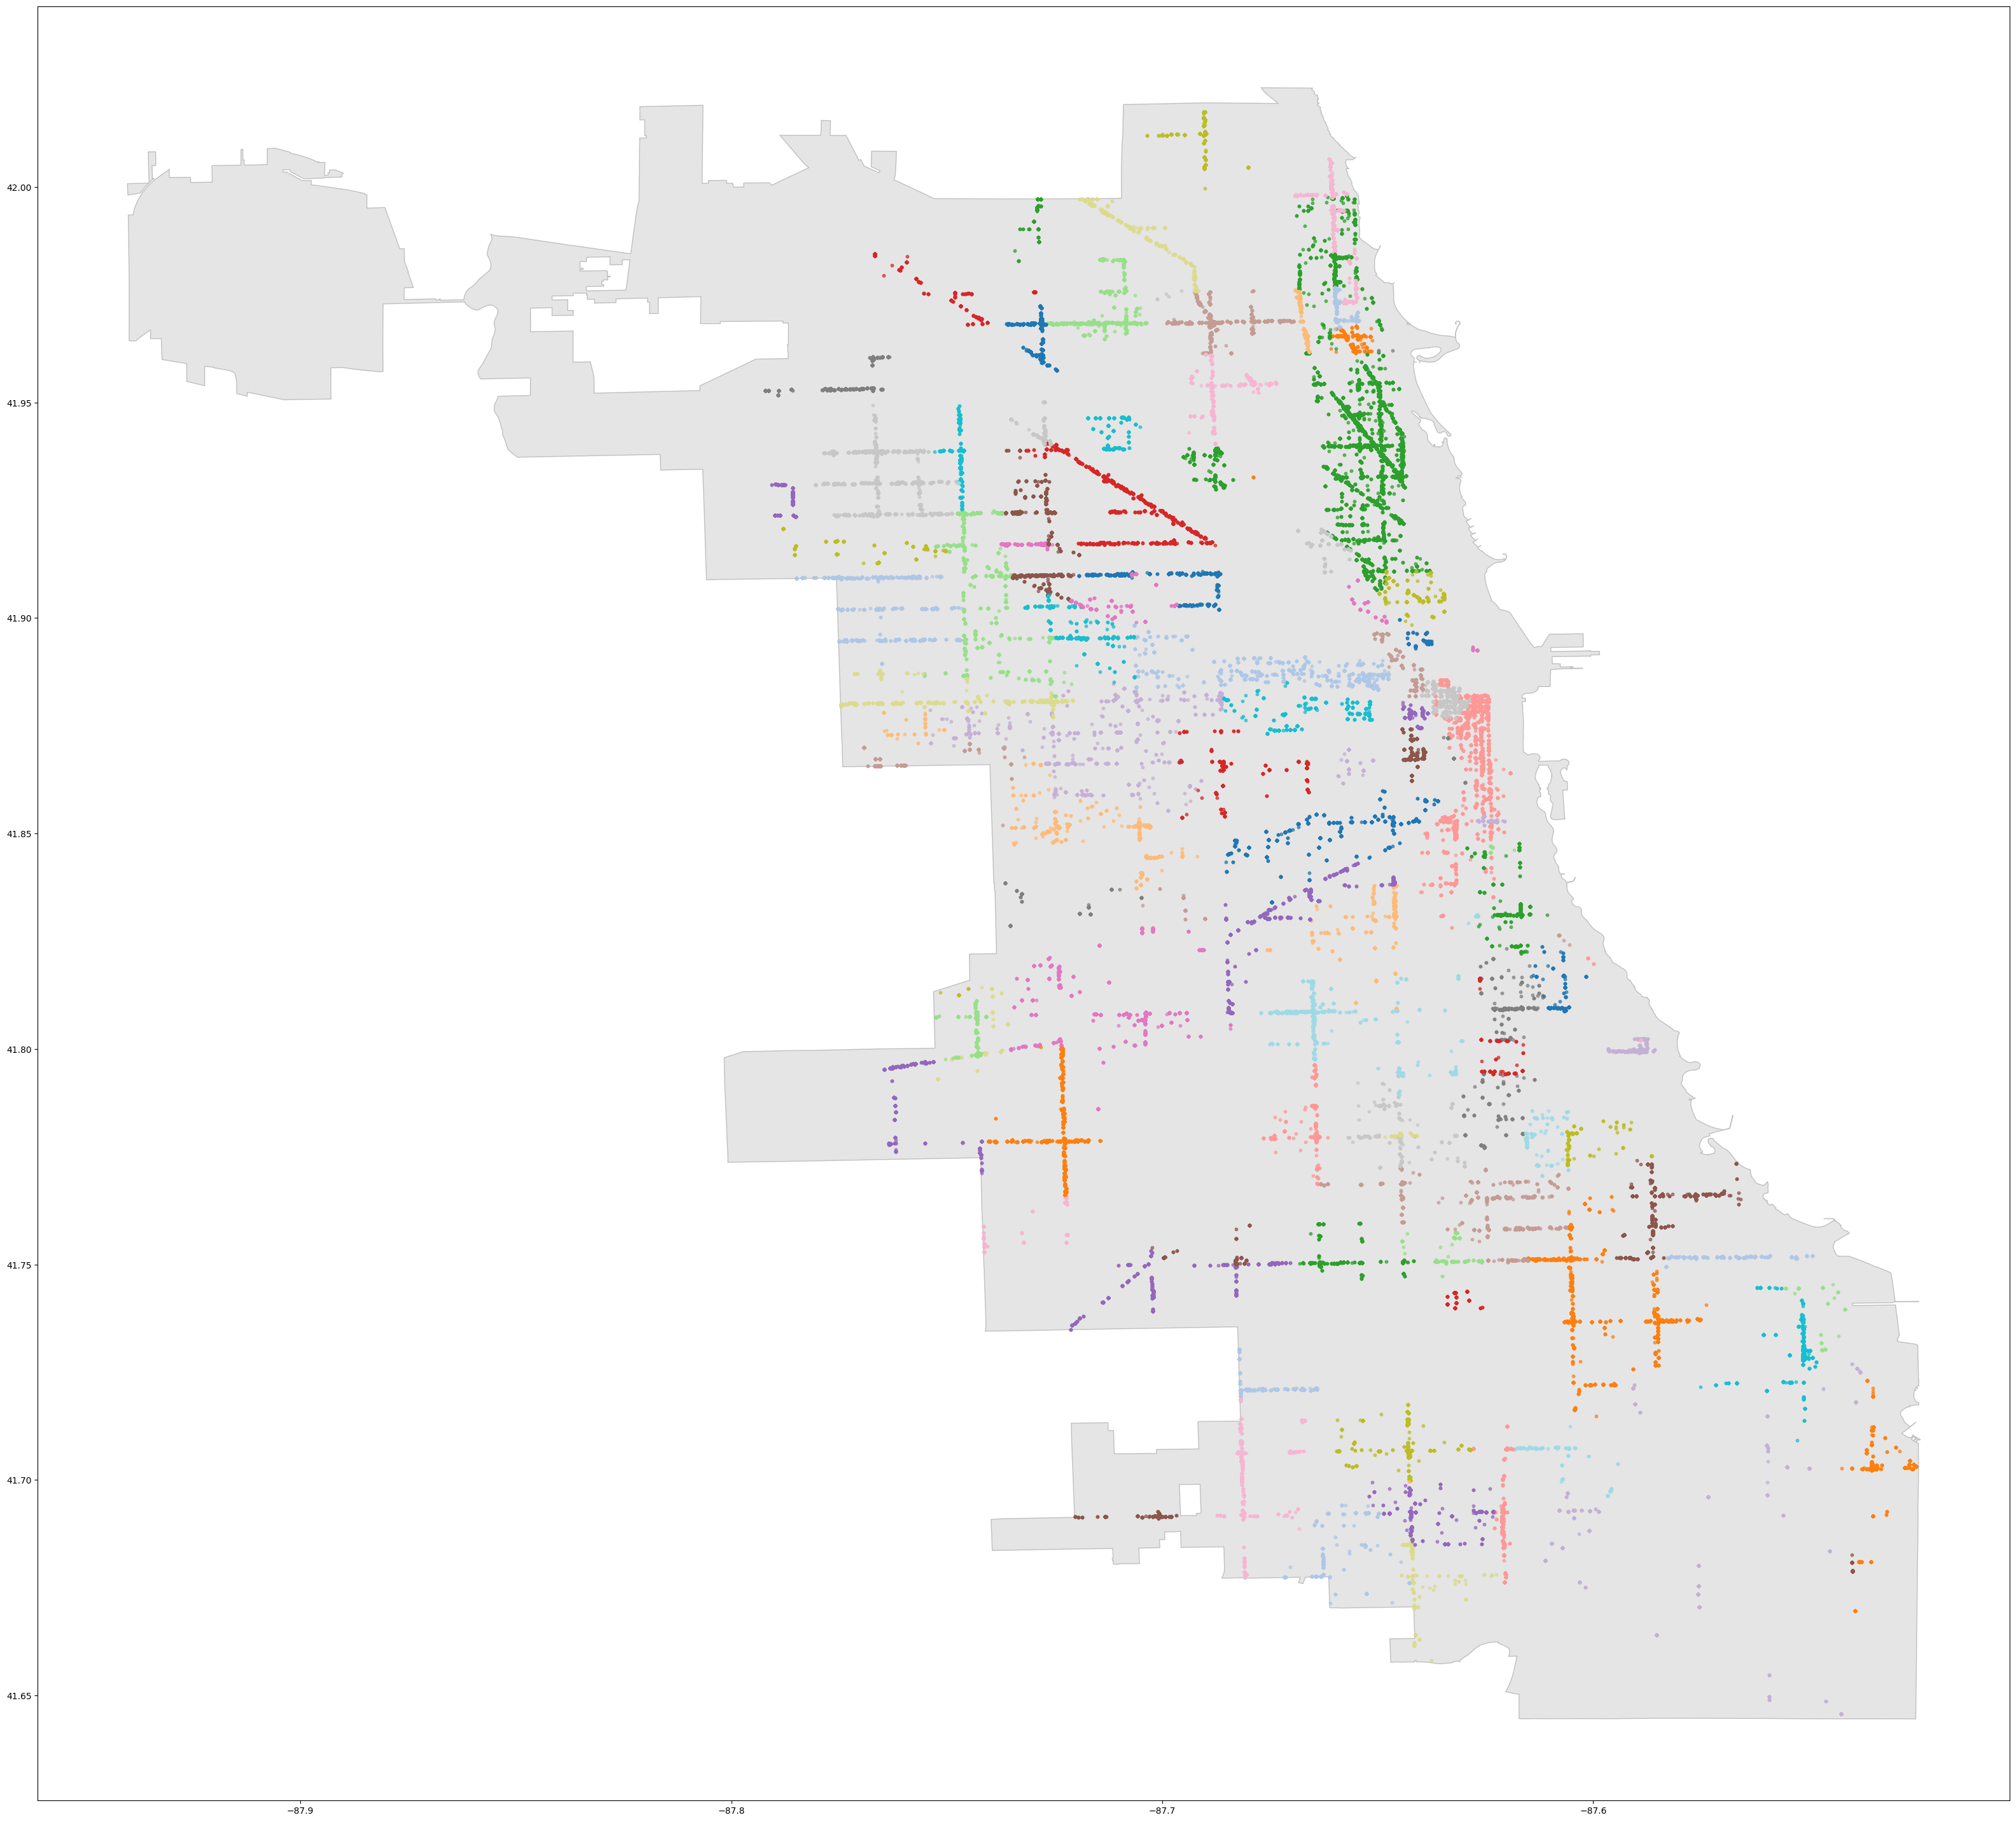

In [ ]:
business_in_points_plot(big_business_in_df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41bd1eeb-8ade-41a5-ae81-cf4a88f38197' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>